In [3]:
import IR_processing_utils
import IR_corrections

import cv2
import numpy as np
from matplotlib import pyplot as plt
import tifffile as tiff


In [39]:
paths = [r"G:\! Data\IFA\! campaigns\202408 Pleistocene Park\IR_Mavic3\1208_day_IR3\DJI_202408121043_198_Pleystocen-IR3\tiffs_thermal_parser, emis = 1.00\DJI_20240812105408_0255_T.tiff", 
         r"G:\! Data\IFA\! campaigns\202408 Pleistocene Park\IR_Mavic3\1208_day_IR3\DJI_202408121043_198_Pleystocen-IR3\tiffs_thermal_parser, emis = 1.00\DJI_20240812105126_0173_T.tiff"]

img1 = np.flipud (np.array(tiff.imread(paths[0])))
img2 = np.flipud (np.array(tiff.imread(paths[1])))

img1_cv = cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
img2_cv = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img1_enhanced = clahe.apply(img1_cv)
img2_enhanced = clahe.apply(img2_cv)

#img1 = cv2.imread(paths[0], cv2.IMREAD_GRAYSCALE)
#img2 = cv2.imread(paths[1], cv2.IMREAD_GRAYSCALE)

In [45]:
#sift = cv2.SIFT_create()

sift = cv2.SIFT_create(
    nfeatures=0,        # 0 = no limit (default is 0, but some versions limit to ~5000)
    nOctaveLayers=3,    # More layers = more features at different scales
    contrastThreshold=0.04,  # Lower = more features (default 0.04, try 0.02-0.03)
    edgeThreshold=10,   # Higher = more features (default 10, try 15-20)
    sigma=1.6           # Gaussian blur sigma
)

kp1, des1 = sift.detectAndCompute(img1_enhanced, None)
kp2, des2 = sift.detectAndCompute(img2_enhanced, None)

bf = cv2.BFMatcher()

matches = bf.knnMatch(des1, des2, k=2) # k=2 for ratio test

good_matches = []
all_matches = []

for m, n in matches:
    if m.distance < 0.75 * n.distance: # Lowe's ratio test
        good_matches.append(m)
    all_matches.append(m)



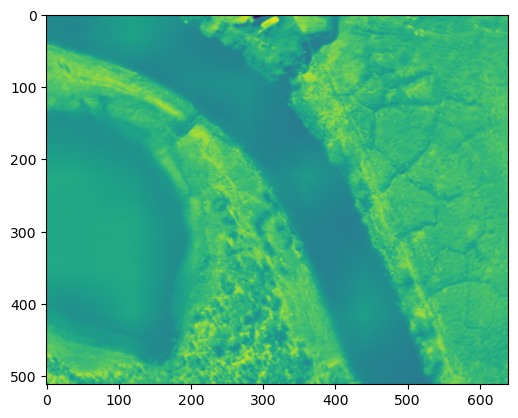

In [46]:
plt.imshow(img1_enhanced)

In [47]:
img1_pts = []
img2_pts = []

for match in good_matches:
    # Get the keypoints for the match
    img1_idx = match.queryIdx  # Index in first image
    img2_idx = match.trainIdx  # Index in second image
    
    # Get coordinates from keypoints
    img1_pt = kp1[img1_idx].pt  # (x, y) in first image
    img2_pt = kp2[img2_idx].pt  # (x, y) in second image
    
    img1_pts.append(img1_pt)
    img2_pts.append(img2_pt)

# Convert to numpy arrays for easier manipulation
img1_pts = np.array(img1_pts)
img2_pts = np.array(img2_pts)

img1_coords = np.round(img1_pts).astype(int)
img2_coords = np.round(img2_pts).astype(int)

img1_tiff_values = img1[img1_coords[:, 1], img1_coords[:, 0]]
img2_tiff_values = img2[img2_coords[:, 1], img2_coords[:, 0]]

delta = img2_tiff_values - img1_tiff_values


In [48]:
img1_pts_all = []
img2_pts_all = []

for match in all_matches:
    # Get the keypoints for the match
    img1_idx = match.queryIdx  # Index in first image
    img2_idx = match.trainIdx  # Index in second image
    
    # Get coordinates from keypoints
    img1_pt = kp1[img1_idx].pt  # (x, y) in first image
    img2_pt = kp2[img2_idx].pt  # (x, y) in second image
    
    img1_pts_all.append(img1_pt)
    img2_pts_all.append(img2_pt)

# Convert to numpy arrays for easier manipulation
img1_pts_all = np.array(img1_pts_all)
img2_pts_all = np.array(img2_pts_all)

img1_coords_all = np.round(img1_pts_all).astype(int)
img2_coords_all = np.round(img2_pts_all).astype(int)


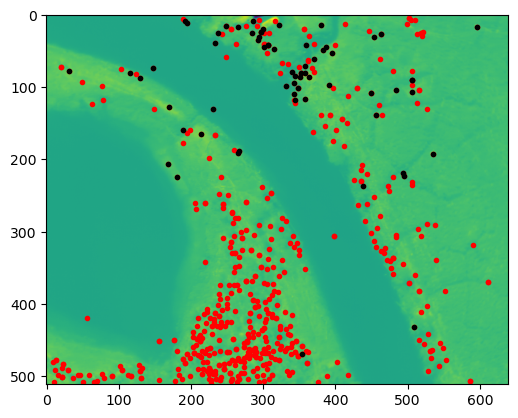

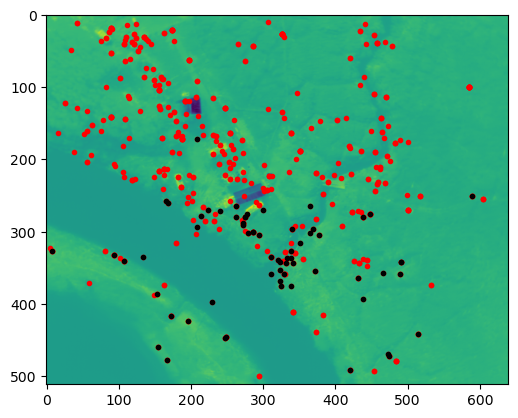

In [49]:

plt.figure()
plt.imshow(img1)
plt.plot(img1_pts_all[:,0], img1_pts_all[:,1], '.', color='red')
plt.plot(img1_pts[:,0], img1_pts[:,1], '.', color='black')

plt.figure()
plt.imshow(img2)
plt.plot(img2_pts_all[:,0], img2_pts_all[:,1], '.', color='red')
plt.plot(img2_pts[:,0], img2_pts[:,1], '.', color='black')